In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


# definir archivos
autopath = "Resources/autosbystate.csv"
# Read the mouse data and the study results
autos_df = pd.read_csv(autopath)

autos_df.head()

,STATE,PRIVATE AND COMMERCIAL AUTOMOBILE,PUBLIC AUTOMOBILE,TOTAL AUTOMOBILES,PRIVATE AND COMMERCIAL BUSES,PUBLIC BUSES,TOTAL BUSES,PRIVATE AND COMMERCIAL TRUCKS,PUBLIC TRUCKS,TOTAL TRUCKS,PRIVATE AND COMMERCIAL MOTORCYCLES,PUBLIC MOTORCYCLES,TOTAL MOTORCYCLES
0,Alabama,2021395,44068,2065463,5550,132,5682,2806624,66119,2872743,111247,938,112185
1,Alaska,169412,4075,173487,7496,584,8080,573399,17680,591079,31852,7,31859
2,Arizona,2371199,20425,2391624,1508,7543,9051,3356363,43341,3399704,164053,2,164055
3,Arkansas,914265,12524,926789,11229,712,11941,1778174,27336,1805510,89457,—,89457
4,California,14615499,245468,14860967,35253,64664,99917,14693888,297826,14991714,828083,14460,842543


In [2]:
autos_df = autos_df.rename(columns={"STATE": "states"})
autos_df.head()

,states,PRIVATE AND COMMERCIAL AUTOMOBILE,PUBLIC AUTOMOBILE,TOTAL AUTOMOBILES,PRIVATE AND COMMERCIAL BUSES,PUBLIC BUSES,TOTAL BUSES,PRIVATE AND COMMERCIAL TRUCKS,PUBLIC TRUCKS,TOTAL TRUCKS,PRIVATE AND COMMERCIAL MOTORCYCLES,PUBLIC MOTORCYCLES,TOTAL MOTORCYCLES
0,Alabama,2021395,44068,2065463,5550,132,5682,2806624,66119,2872743,111247,938,112185
1,Alaska,169412,4075,173487,7496,584,8080,573399,17680,591079,31852,7,31859
2,Arizona,2371199,20425,2391624,1508,7543,9051,3356363,43341,3399704,164053,2,164055
3,Arkansas,914265,12524,926789,11229,712,11941,1778174,27336,1805510,89457,—,89457
4,California,14615499,245468,14860967,35253,64664,99917,14693888,297826,14991714,828083,14460,842543


In [3]:
gaspath = "gasoline0406.csv"
gas_df = pd.read_csv(gaspath)
gas_df

,states,gasoline,midGrade,premium,diesel
0,Alaska,2.301,2.402,2.570,2.357
1,Alabama,1.672,1.999,2.332,2.262
2,Arkansas,1.676,1.961,2.245,2.101
3,Arizona,2.197,2.478,2.732,2.501
4,California,2.922,3.096,3.213,3.262
5,Colorado,2.149,2.445,2.715,2.271
6,Connecticut,1.978,2.372,2.601,2.718
7,District of Columbia,2.132,2.657,2.735,2.808
8,Delaware,1.910,2.306,2.526,2.294
9,Florida,1.894,2.265,2.552,2.428


In [4]:
gas_autos_df = pd.merge(gas_df,autos_df, on='states',  how='outer')
gas_autos_df

,states,gasoline,midGrade,premium,diesel,PRIVATE AND COMMERCIAL AUTOMOBILE,PUBLIC AUTOMOBILE,TOTAL AUTOMOBILES,PRIVATE AND COMMERCIAL BUSES,PUBLIC BUSES,TOTAL BUSES,PRIVATE AND COMMERCIAL TRUCKS,PUBLIC TRUCKS,TOTAL TRUCKS,PRIVATE AND COMMERCIAL MOTORCYCLES,PUBLIC MOTORCYCLES,TOTAL MOTORCYCLES
0,Alaska,2.301,2.402,2.570,2.357,169412,4075,173487,7496,584,8080,573399,17680,591079,31852,7,31859
1,Alabama,1.672,1.999,2.332,2.262,2021395,44068,2065463,5550,132,5682,2806624,66119,2872743,111247,938,112185
2,Arkansas,1.676,1.961,2.245,2.101,914265,12524,926789,11229,712,11941,1778174,27336,1805510,89457,—,89457
3,Arizona,2.197,2.478,2.732,2.501,2371199,20425,2391624,1508,7543,9051,3356363,43341,3399704,164053,2,164055
4,California,2.922,3.096,3.213,3.262,14615499,245468,14860967,35253,64664,99917,14693888,297826,14991714,828083,14460,842543
5,Colorado,2.149,2.445,2.715,2.271,1768221,16837,1785058,5998,7307,13305,3231050,40545,3271595,190002,—,190002
6,Connecticut,1.978,2.372,2.601,2.718,1301153,1186,1302339,11342,36,11378,1417371,5131,1422502,90111,20,90131
7,District of Columbia,2.132,2.657,2.735,2.808,191723,16418,208141,1002,3883,4885,113857,14843,128700,3897,393,4290
8,Delaware,1.910,2.306,2.526,2.294,417700,1499,419199,3335,428,3763,516931,3030,519961,27810,—,27810
9,Florida,1.894,2.265,2.552,2.428,7670861,107632,7778493,25004,34592,59596,8396619,138294,8534913,583685,2582,586267


In [17]:
gas_autos_df['TOTAL MOTOR VEHICLES'] = gas_autos_df['TOTAL AUTOMOBILES'] + gas_autos_df['TOTAL BUSES'] + gas_autos_df['TOTAL TRUCKS']+ gas_autos_df['TOTAL MOTORCYCLES']
gas_autos_df.columns

Index(['states', 'gasoline', 'midGrade', 'premium', 'diesel',
       'PRIVATE AND COMMERCIAL AUTOMOBILE', 'PUBLIC AUTOMOBILE',
       'TOTAL AUTOMOBILES', 'PRIVATE AND COMMERCIAL BUSES', 'PUBLIC BUSES',
       'TOTAL BUSES', 'PRIVATE AND COMMERCIAL TRUCKS', 'PUBLIC TRUCKS',
       'TOTAL TRUCKS', 'PRIVATE AND COMMERCIAL MOTORCYCLES',
       'PUBLIC MOTORCYCLES', 'TOTAL MOTORCYCLES', 'TOTAL MOTOR VEHICLES'],
      dtype='object')

In [ ]:
gas_autos_reduced_df = gas_autos_df['states', 'gasoline', 'midGrade', 'premium', 'diesel',
       'PRIVATE AND COMMERCIAL AUTOMOBILE', 'PUBLIC AUTOMOBILE',
       'TOTAL AUTOMOBILES', 'PRIVATE AND COMMERCIAL BUSES', 'PUBLIC BUSES',
       'TOTAL BUSES', 'PRIVATE AND COMMERCIAL TRUCKS', 'PUBLIC TRUCKS',
       'TOTAL TRUCKS', 'PRIVATE AND COMMERCIAL MOTORCYCLES',
       'PUBLIC MOTORCYCLES', 'TOTAL MOTORCYCLES', 'TOTAL MOTOR VEHICLES']

In [23]:
def autos_gas (x,y,label,grid=False,reg=False,title='notitle'):
    plt.scatter(x,y,marker='o',edgecolors="black")
    plt.xlabel('Total Cars')
    plt.ylabel(label)
    plt.grid(grid)

  

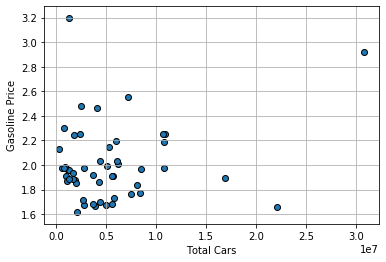

In [35]:
autos_gas(gas_autos_df['TOTAL MOTOR VEHICLES'],gas_autos_df['gasoline'],
              'Gasoline Price',True,False)

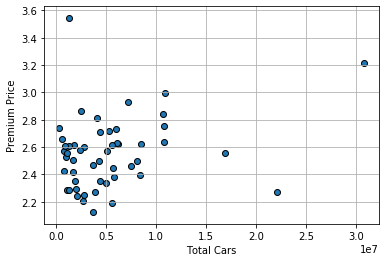

In [37]:
autos_gas(gas_autos_df['TOTAL MOTOR VEHICLES'],gas_autos_df['premium'],
              'Premium Price',True,False)

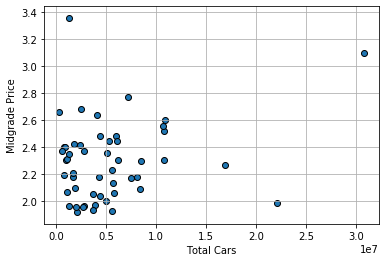

In [36]:
autos_gas(gas_autos_df['TOTAL MOTOR VEHICLES'],gas_autos_df['midGrade'],
              'Midgrade Price',True,False)

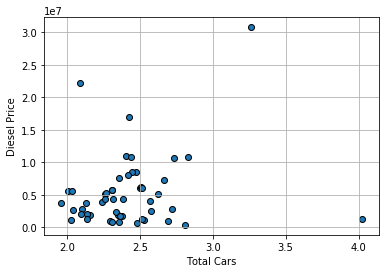

In [27]:
autos_gas(gas_autos_df['TOTAL MOTOR VEHICLES'],gas_autos_df['diesel'],
              'Diesel Price',True,False,"Max Temperature")

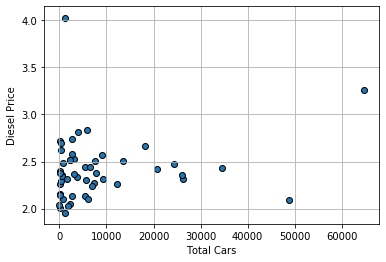

In [31]:
autos_gas(gas_autos_df['PUBLIC BUSES'],gas_autos_df['diesel'],
              'Diesel Price',True,False)